In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()

# Linear Advection-Diffusion Solved by Finite Differences
## Taken from Tony Saad's CHEN 6355 course at University of Utah (<a>www.ucfd.tonysaad.net</a>)
**Adapted by Matt Williams (<a>matt.williams@alum.mit.edu</a>)**
<hr/>

The linear advection equation is given by:

$$\frac{\partial u}{\partial t} \  =\  -c\frac{\partial u}{\partial x} +\mu \frac{\partial^{2} u}{\partial x^{2}} $$

For an initial condition $u(x,0)=Asin(\omega x)$, the solution of this equation is:

$$u(x,t)\  =\  Asin[\omega (x-ct)]e^{-\mu \omega^{2} t}$$

A numerical scheme that is forward Euler in time, centered in space is:

$$\frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} =-c\frac{u^{n}_{i+1}-u^{n}_{i-1}}{2\Delta x} +\mu \frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^{2}} $$

$$u^{n+1}_{i}=-c\frac{\Delta t}{2\Delta x} (u^{n}_{i+1}-u^{n}_{i-1})+\mu \frac{\Delta t}{\Delta x^{2}} (u^{u}_{i+1}-2u^{n}_{i}+u^{n}_{i-1})$$

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.animation as animation
from matplotlib import cm
plt.rcParams['animation.html'] = 'html5'

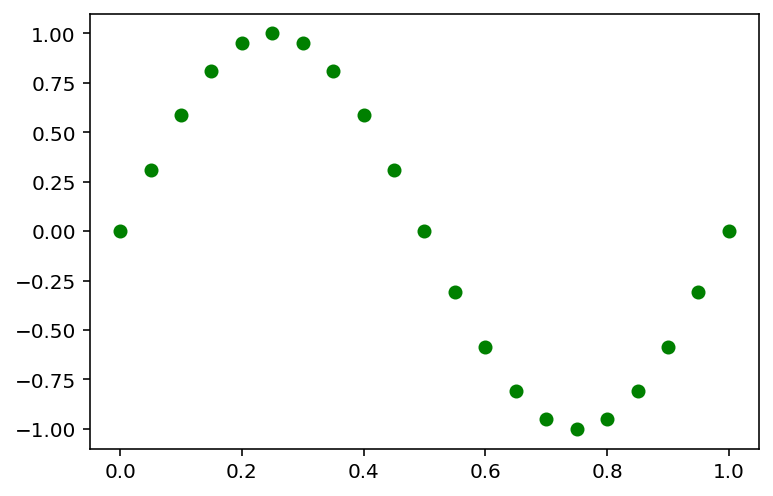

In [3]:
# Initial condition
Lx = 1.
nx = 21
dx = Lx/(nx-1)
x = np.linspace(0, Lx, nx)
u0 = np.sin(2.*np.pi*x)
plt.plot(x, u0,'go')

In [9]:
t_end = 3.          # sec
c = 1.              # wave speed, m/s
dt = 0.05
cfl = c*dt/dx/2     # CFL number
mu = 0.05
nfl = mu*dt/dx**2
sol = []
sol.append(u0)
sol_exact = []
sol_exact.append(u0)
t = 0.
omega = 2*np.pi

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    # Interior nodes
    unew[1:-1] = un[1:-1] - cfl*(un[2:]-un[:-2]) + nfl*(un[2:]-2*un[1:-1]+un[:-2])
    # Periodic boundary condition, u[i+1] = u[1] at right boundary
    unew[-1] = un[-1] - cfl*(un[1]-un[-2]) + nfl*(un[1]-2*un[-1]+un[-2])
    unew[0] = unew[-1]
    u_exact = np.sin(omega*(x-c*t))*np.exp(-mu*omega**2*t)
    sol.append(unew)
    sol_exact.append(u_exact)
    t += dt

ValueError: x and y must have same first dimension, but have shapes (21,) and (23, 23)

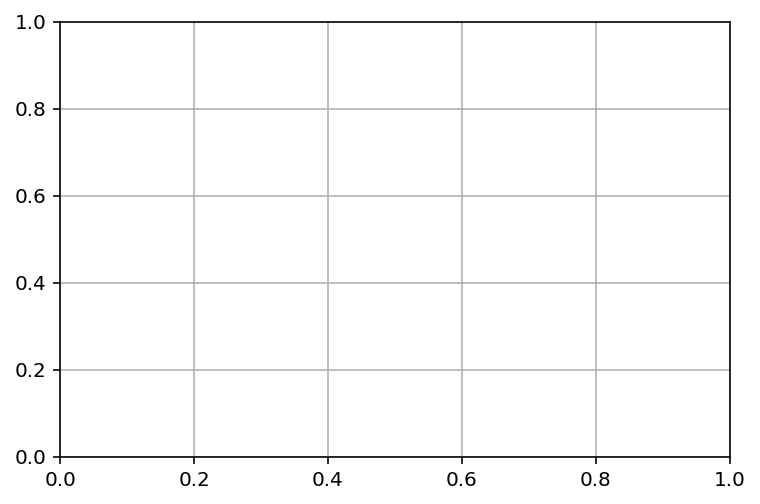

In [61]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution, exact in zip(sol, sol_exact):
    if (i%1==0):
        im = plt.plot(x, solution, 'go', x, exact, 'k-', animated=True)
        plt.ylim(-1,1)
        plt.xlabel('x')
        plt.ylabel('amplitude')
        plt.title(f'dt={dt}, N={nx}, mu={mu}')
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save('adconv.mp4')

In [11]:
%%HTML
<video width="640" height="480" controls>
    <source src="adconv.mp4" type="video/mp4">
</video>

In [6]:
# Change dt
t_end = 3.          # sec
c = 1.              # wave speed, m/s
dt = 0.025
cfl = c*dt/dx/2     # CFL number
mu = 0.05
nfl = mu*dt/dx**2
sol = []
sol.append(u0)
sol_exact = []
sol_exact.append(u0)
t = 0.
omega = 2*np.pi

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    # Interior nodes
    unew[1:-1] = un[1:-1] - cfl*(un[2:]-un[:-2]) + nfl*(un[2:]-2*un[1:-1]+un[:-2])
    # Periodic boundary condition, u[i+1] = u[1] at right boundary
    unew[-1] = un[-1] - cfl*(un[1]-un[-2]) + nfl*(un[1]-2*un[-1]+un[-2])
    unew[0] = unew[-1]
    u_exact = np.sin(omega*(x-c*t))*np.exp(-mu*omega**2*t)
    sol.append(unew)
    sol_exact.append(u_exact)
    t += dt

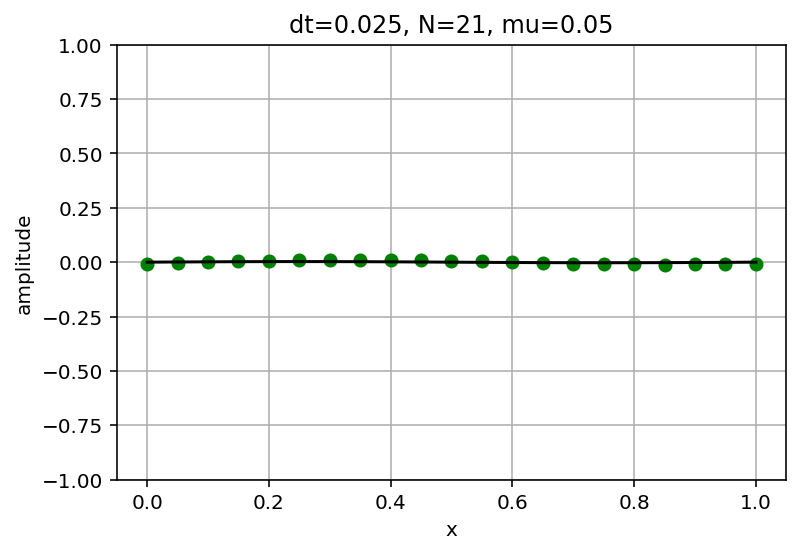

In [7]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution, exact in zip(sol, sol_exact):
    if (i%1==0):
        im = plt.plot(x, solution, 'go', x, exact, 'k-', animated=True)
        plt.ylim(-1,1)
        plt.xlabel('x')
        plt.ylabel('amplitude')
        plt.title(f'dt={dt}, N={nx}, mu={mu}')
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save('adconv.mp4')

In [8]:
%%HTML
<video width="640" height="480" controls>
    <source src="adconv.mp4" type="video/mp4">
</video>

## Adjustment to periodic boundary conditions

An alternative scheme for the boundary conditions is to include "ghost points" outside of the domain. When the domain is translated, the ghost point on the right becomes is set equal second interior point. The leftmost ghost point is set equal to the penultimate interior point. This means the solution array will be n+2 in size.

In [28]:
t_end = 3.          # sec
c = 1.              # wave speed, m/s
dt = 0.01
cfl = c*dt/dx/2     # CFL number
mu = 0.05
nfl = mu*dt/dx**2
sol = []
t = 0.
omega = 2*np.pi
u0 = lambda x: np.sin(omega*x)
u = np.zeros(nx+2)
u[1:-1] = u0(x)
u[-1] = u[2]
u[0] = u[-3]
sol.append(u)

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    # Interior nodes
    unew[1:-1] = un[1:-1] - cfl*(un[2:]-un[:-2]) + nfl*(un[2:]-2*un[1:-1]+un[:-2])
    # Periodic boundary condition, u[i+1] = u[1] at right boundary
    unew[-1] = un[2]
    unew[0] = unew[-3]
    sol.append(unew)
    t += dt

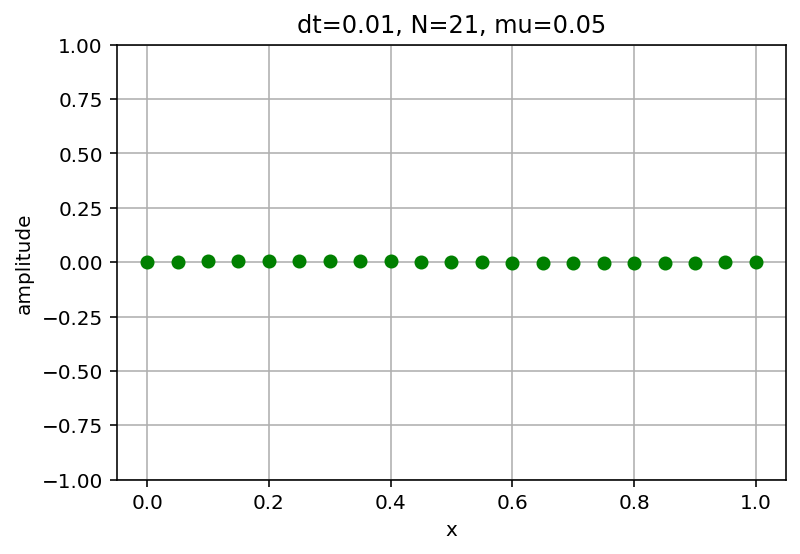

In [32]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution in sol:
    if (i%10==0):
        im = plt.plot(x, solution[1:-1], 'go', animated=True)
        plt.ylim(-1,1)
        plt.xlabel('x')
        plt.ylabel('amplitude')
        plt.title(f'dt={dt}, N={nx}, mu={mu}')
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save('periodic.mp4')

In [33]:
%%HTML
<video width="640" height="480" controls>
    <source src="periodic.mp4" type="video/mp4">
</video>

## 2D Advection

$$\frac{\partial u}{\partial t} =-U\frac{\partial u}{\partial x} -V\frac{\partial u}{\partial y} $$

$$u^{n+1}_{i,j}=u^{n}_{i,j}-U\frac{\Delta t}{\Delta x} (u^{n}_{i,j}-u^{n}_{i-1,j})-V\frac{\Delta t}{\Delta x} (u^{n}_{i,j}-u^{u}_{i,j-1})$$

In [34]:
nx = 21
ny = 21
Lx = 1.
Ly = 1.
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = Lx/(nx-1)
dy = Ly/(ny-1)
xx, yy = np.meshgrid(x, y)

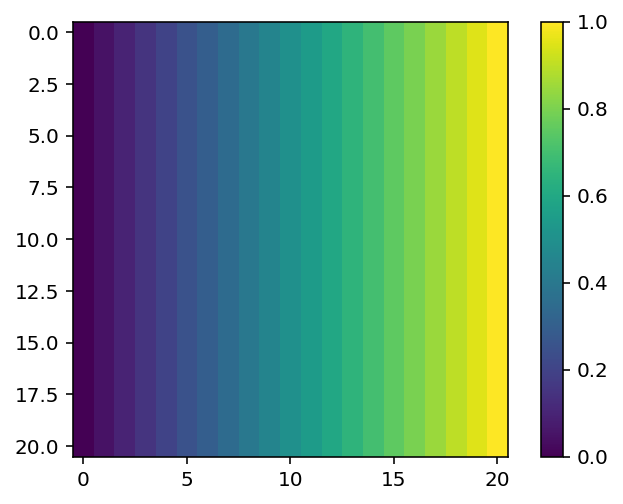

In [41]:
plt.imshow(xx, cmap=cm.viridis)
plt.colorbar()

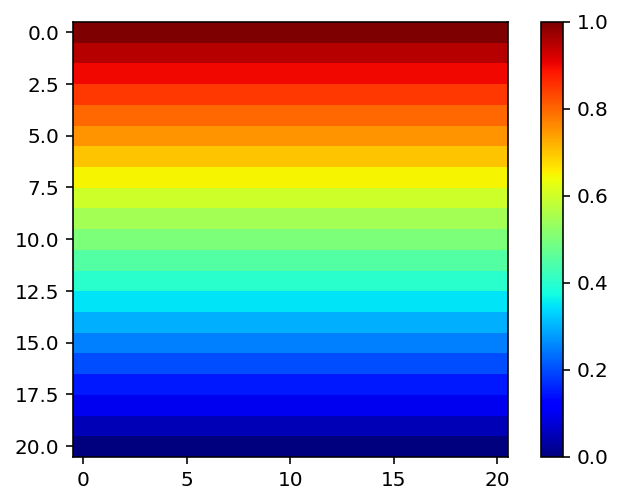

In [47]:
plt.imshow(np.flipud(yy), cmap=cm.jet)
plt.colorbar()

Prof Saad likes to consider the indices for 2D arrays as if they were laid out on a grid in accordance with the index notation. That is, the second index (axis=1), indexes across the columns, and so it spatially represents traversing all x-values in a normally oriented grid.

In [49]:
ω0 = 2*np.pi
u0 = lambda x, y: np.sin(ω0*x)*np.sin(ω0*y)

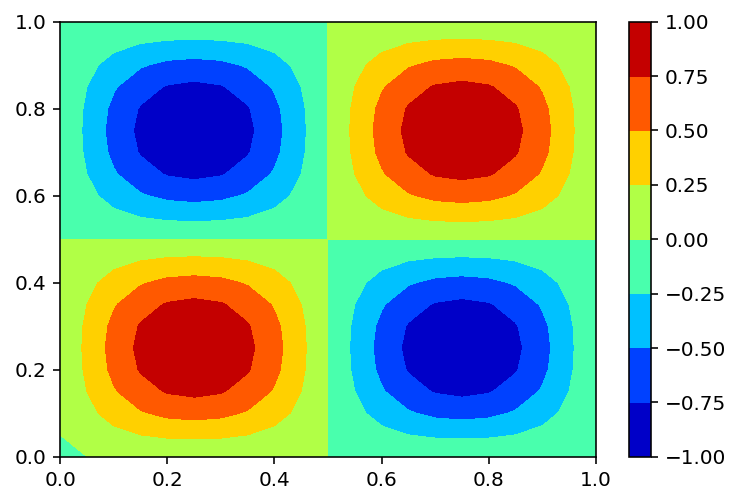

In [54]:
plt.contourf(xx,yy,u0(xx,yy), cmap=cm.jet)
plt.colorbar()

In [64]:
# Velocities
cx = 1.
cy = 1.
dt = 0.001
t_end = 0.5
t = 0.
cflx = cx*dt/dx
cfly = cy*dt/dy
# Set up initial condition
sol = []
u = np.zeros((nx+2,ny+2))
u[1:-1,1:-1] = u0(xx,yy)
# Set periodic boundaries
u[:,0] = u[:,-3]   # x-minus face
u[:,-1] = u[:,2]   # x-plus face
u[0,:] = u[-3,:]   # y-minus face
u[-1,:] = u[2,:]   # y-plus face
sol.append(u)

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    unew[1:-1,1:-1] = un[1:-1,1:-1] - cflx*(un[1:-1,1:-1]-un[1:-1,:-2]) -\
                      cfly*(un[1:-1,1:-1]-un[:-2,1:-1])
    # Set periodic boundaries
    unew[:,0] = unew[:,-3]   # x-minus face
    unew[:,-1] = unew[:,2]   # x-plus face
    unew[0,:] = unew[-3,:]   # y-minus face
    unew[-1,:] = unew[2,:]   # y-plus face
    
    sol.append(unew)
    t += dt

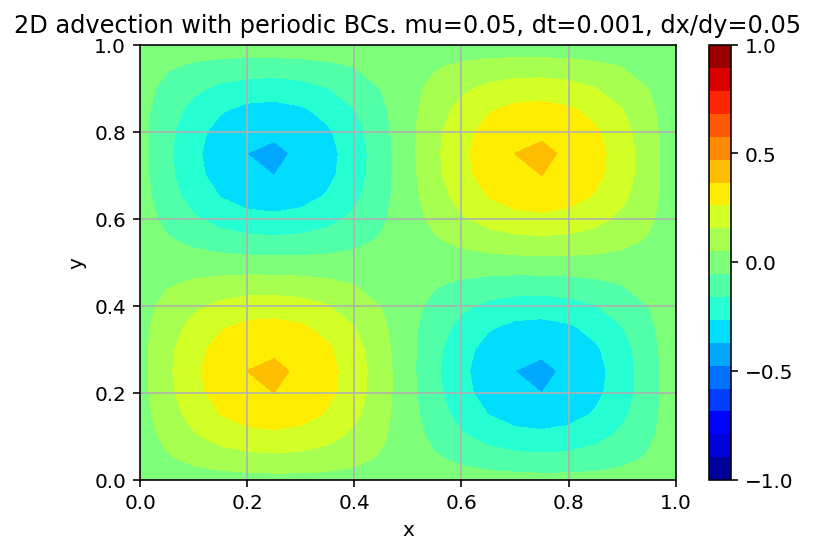

In [65]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
t = 0
levs = np.linspace(-1, 1, 20)
for solution in sol:
    if (i%10==0):
        im = plt.contourf(xx, yy, solution[1:-1,1:-1], cmap=cm.jet, levels=levs, vmax=1., vmin=-1.)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'2D advection with periodic BCs. mu={mu}, dt={dt}, dx/dy={dx}')
        ims.append(im.collections)
    i += 1
    t += dt
cbar = plt.colorbar()
plt.clim(-1, 1)
cbar.set_ticks(np.linspace(-1,1,5))
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani
# ani.save('advec2D.mp4')

In [70]:
xx[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])